# Problem 1: Importance Sampling

Load the Line Fitting dataset (line_fitting.csv) and plot the data.

Fit a model to the data using:
a. Uniform priors on all parameters
b. Modestly informative Gaussian priors on all parameters
c. Strongly informative Gaussian priors on all parameters

Draw samples from the posterior using any sampler of your choosing.

After sampling in cases (b) and (c), calculate importance weights and resample your posteriors in order to "undo" the informative prior. This step will create a vector of unweighted posterior samples from your original vector of weighted posterior samples. Verify that after importance sampling your results are equivalent to what you obtained in case (a).

Examine the posterior distributions. Do you see any numerical noise or other sampling artifacts introduced by importance sampling?

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy import stats


data = pd.read_csv('/Users/f006zcq/Desktop/LSST-DSFP/KHSession23/Day3/line_fitting.csv')

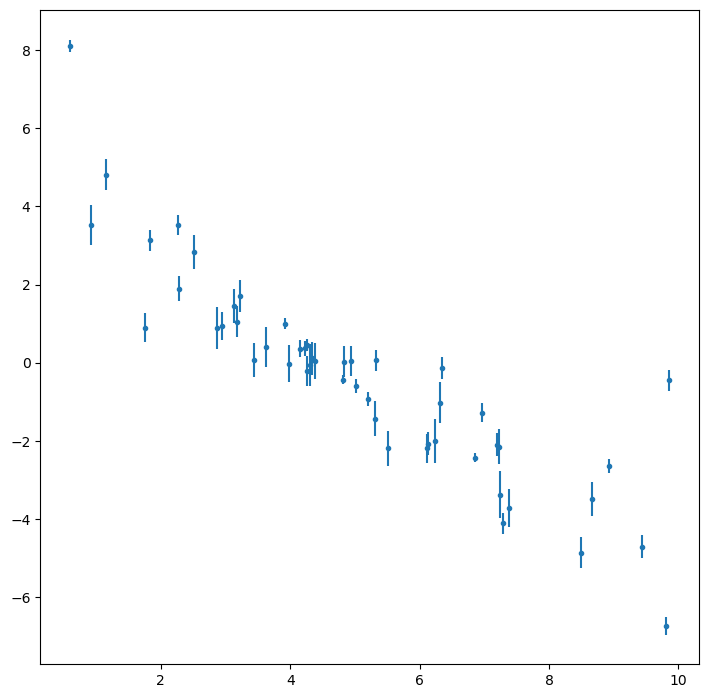

In [11]:
plt.figure(figsize=(8.5,8.5))
plt.errorbar(data['x'],data['y'],yerr=data['y_err'],fmt='.')
plt.show()

In [48]:
# uniform priors first

import pymc as pm

x_plot = np.linspace(0,10,100)

with pm.Model() as model:
    m = pm.Uniform('m', lower=-5, upper=1)
    b = pm.Uniform('b', lower=0, upper=10)
    
    y_mod = m*data['x'].values + b
    
    
    y_plot = pm.Deterministic('y_plot', m*x_plot + b)
    
    lnlike = pm.Normal('lnlike', mu=y_mod, sigma=data['y_err'], observed=data['y'])
    
with model:    
    trace = pm.sample(tune=8000, draws=1000, chains=2, target_accept=0.9, return_inferencedata=True)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [m, b]


Sampling 2 chains for 8_000 tune and 1_000 draw iterations (16_000 + 2_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [49]:
y_plot = np.percentile(trace.posterior.y_plot, [16,50,84], axis=[0,1])

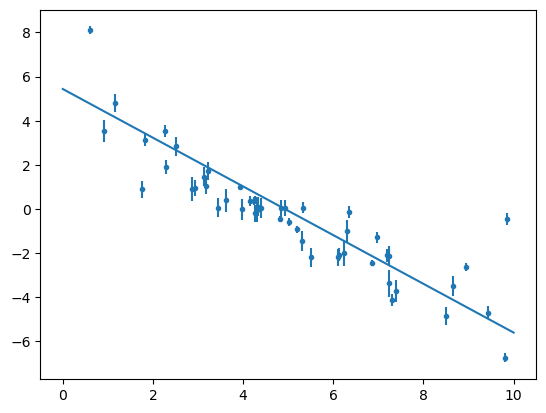

In [51]:
import arviz as az

plt.errorbar(data['x'],data['y'],data['y_err'],fmt='.')
plt.plot(x_plot, y_plot[1], color='C0')


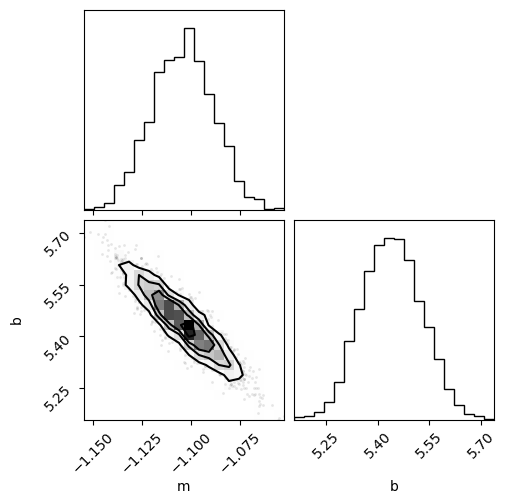

In [52]:
_ = corner.corner(trace, var_names=['m', 'b'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [m, b]


Sampling 2 chains for 8_000 tune and 1_000 draw iterations (16_000 + 2_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


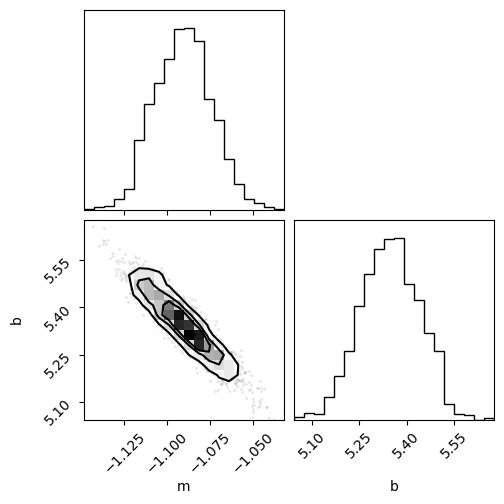

In [58]:
x_plot = np.linspace(0,10,100)

with pm.Model() as model:
    m = pm.Normal('m', mu = -10, sigma= .5)
    b = pm.Normal('b', mu = 1, sigma=.5)
    
    y_mod = m*data['x'].values + b
    
    
    y_plot = pm.Deterministic('y_plot', m*x_plot + b)
    
    lnlike = pm.Normal('lnlike', mu=y_mod, sigma=data['y_err'], observed=data['y'])
    
with model:    
    trace = pm.sample(tune=8000, draws=1000, chains=2, target_accept=0.9, return_inferencedata=True)

y_plot = np.percentile(trace.posterior.y_plot, [16,50,84], axis=[0,1])
_ = corner.corner(trace, var_names=['m', 'b'])

# Problem 2: Umbrella Sampling Tutorial

Work through the umbrella sampling tutorial here: https://gjgilbert.github.io/tutorials/umbrella_sampling/

Once you complete the tutorial, return to the Line Fitting dataset from Problem 1. Fit a model using umbrella sampling. You'll need to choose how to define your umbrella windows and biases - there are many possible solutions! After sampling from individual umbrellas, combine your samples into a single set of posterior samples. Verify that the results you obtain from umbrella sampling are equivalent to the results you obtain from other methods.

# Problem 3: Reparameterizing a Model

Read in the Two Component Sinusoid dataset (two_component_sinusoid.csv) and plot the data.

Fit a model using the most "obvious" parameterization:

$y(x) = A_1 \sin(2\pi f_1 x - \phi_1 + A_2 \sin(2\pi f_2 x - \phi_2)$

Place appropriate independent priors on each of the six free parameters. Try fitting a model, drawing samples using a sampler of your choosing. Check for convergence and assess the quality of your results. Re-run your model a few times and check if your results remain consistent from run-to-run.

You will probably not acheive a very good fit using this parameterization. Why is this parameterization problematic? Re-parameterize the model in order to get a more robust fit. Check for convergence and that your posteriors remain consistent from run-to-run.